In [1]:
#import all libraries and classes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#import the dataset
bankdata = pd.read_csv(r"C:\Users\Williams\Desktop\DataScienceWithAiLead\PROJECT\bank_data.csv")

In [3]:
#copy the dataset to another variable
bankdata_df = bankdata.copy()

In [4]:
#check for null columns
bankdata_df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [5]:
#check the dimension of the dataset
bankdata_df.shape

(41188, 21)

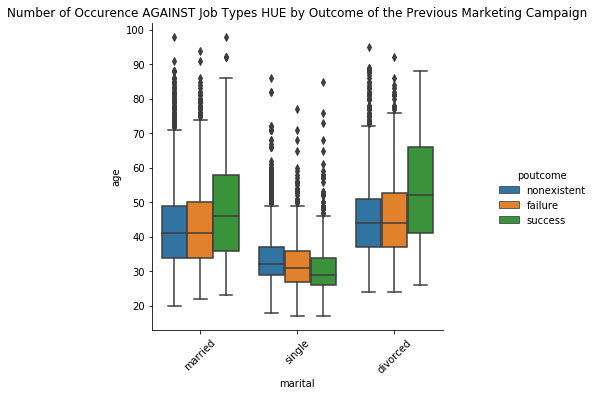

In [6]:
#Visualise "marital" and "age"
sns.catplot(x="marital", y="age", hue="poutcome", data=bankdata_df, kind="box")
plt.title("Number of Occurence AGAINST Job Types HUE by Outcome of the Previous Marketing Campaign")
plt.xticks(rotation=45)
plt.show()

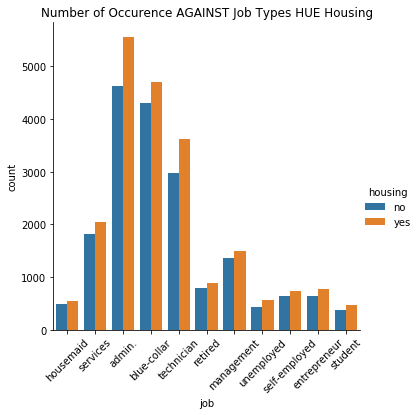

In [7]:
#Visualise "job" and "housing"
sns.catplot(x="job", data=bankdata_df, hue="housing", kind="count")
plt.title("Number of Occurence AGAINST Job Types HUE Housing")
plt.xticks(rotation=45)
plt.show()

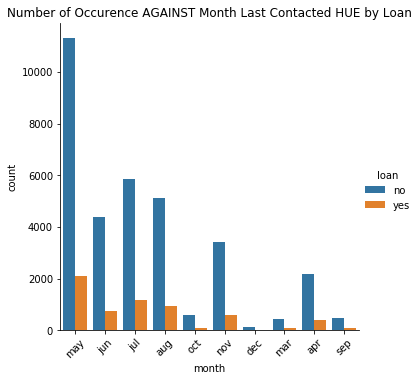

In [8]:
#Visualise "month" and "loan"
sns.catplot(x="month", hue="loan", data=bankdata_df, kind="count")
plt.title("Number of Occurence AGAINST Month Last Contacted HUE by Loan")
plt.xticks(rotation=45)
plt.show()

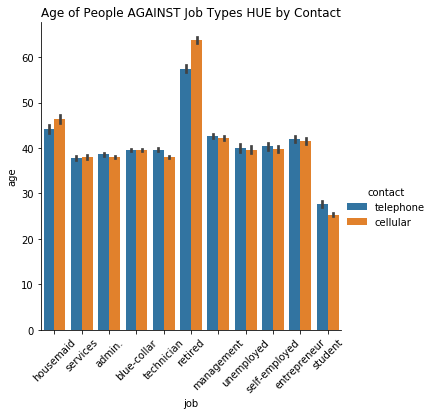

In [9]:
#Visualise "job" and "age"
sns.catplot(x="job", y="age", hue="contact", data=bankdata_df, kind="bar")
plt.title("Age of People AGAINST Job Types HUE by Contact")
plt.xticks(rotation=45)
plt.show()

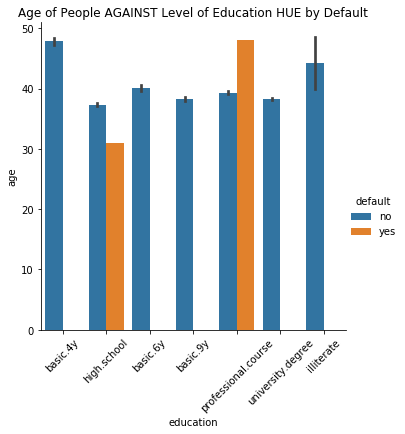

In [10]:
#Visualise "education" and "age"
sns.catplot(x="education", y="age", data=bankdata_df, hue="default", kind="bar")
plt.title("Age of People AGAINST Level of Education HUE by Default")
plt.xticks(rotation=45)
plt.show()

In [11]:
#clean the data

In [12]:
#check the categories of education
bankdata_df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [13]:
#check the most occurring job category grouped by educational level

In [14]:
#fill the null values of each group by its most occurring value
universitydegree = bankdata_df.groupby("education").get_group("university.degree")["job"].mode()[0]
highschool = bankdata_df.groupby("education").get_group("high.school")["job"].mode()[0]
basic9y = bankdata_df.groupby("education").get_group("basic.9y")["job"].mode()[0]
professionalcourse = bankdata_df.groupby("education").get_group("professional.course")["job"].mode()[0]
basic4y = bankdata_df.groupby("education").get_group("basic.4y")["job"].mode()[0]
basic6y = bankdata_df.groupby("education").get_group("basic.6y")["job"].mode()[0]
illiterate = bankdata_df.groupby("education").get_group("illiterate")["job"].mode()[0]

In [15]:
universitydegree = bankdata_df.groupby("education").get_group("university.degree")["job"].fillna(value=universitydegree)
bankdata_df["job"].update(universitydegree)


highschool = bankdata_df.groupby("education").get_group("high.school")["job"].fillna(value=highschool)
bankdata_df["job"].update(highschool)


basic9y = bankdata_df.groupby("education").get_group("basic.9y")["job"].fillna(value=basic9y)
bankdata_df["job"].update(basic9y)


professionalcourse = bankdata_df.groupby("education").get_group("professional.course")["job"].fillna(value=professionalcourse)
bankdata_df["job"].update(professionalcourse)


basic4y = bankdata_df.groupby("education").get_group("basic.4y")["job"].fillna(value=basic4y)
bankdata_df["job"].update(basic4y)



basic6y = bankdata_df.groupby("education").get_group("basic.6y")["job"].fillna(value=basic6y)
bankdata_df["job"].update(basic6y)


illiterate = bankdata_df.groupby("education").get_group("illiterate")["job"].fillna(value=illiterate)
bankdata_df["job"].update(illiterate)


bankdata_df["job"].fillna(value="blue-collar", inplace=True)


bankdata_df["job"].isnull().sum()

0

In [16]:
#check the categories of job
bankdata_df["job"].value_counts()

admin.           10504
blue-collar       9490
technician        6755
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [17]:
#check the most occurring marital status grouped by job type

In [18]:
#fill the null values of each group by its most occurring value
admin1 = bankdata_df.groupby("job").get_group("admin.")["marital"].mode()[0]
bluecollar1 = bankdata_df.groupby("job").get_group("blue-collar")["marital"].mode()[0]
technician1 = bankdata_df.groupby("job").get_group("technician")["marital"].mode()[0]
services1 = bankdata_df.groupby("job").get_group("services")["marital"].mode()[0]
management1 = bankdata_df.groupby("job").get_group("management")["marital"].mode()[0]
retired1 = bankdata_df.groupby("job").get_group("retired")["marital"].mode()[0]
entrepreneur1 = bankdata_df.groupby("job").get_group("entrepreneur")["marital"].mode()[0]
selfemployed1 = bankdata_df.groupby("job").get_group("self-employed")["marital"].mode()[0]
housemaid1 = bankdata_df.groupby("job").get_group("housemaid")["marital"].mode()[0]
unemployed1 =  bankdata_df.groupby("job").get_group("unemployed")["marital"].mode()[0]
student1 = bankdata_df.groupby("job").get_group("student")["marital"].mode()[0]

In [19]:
admin1 = bankdata_df.groupby("job").get_group("admin.")["marital"].fillna(value=admin1)
bankdata_df["marital"].update(admin1)


bluecollar1 = bankdata_df.groupby("job").get_group("blue-collar")["marital"].fillna(value=bluecollar1)
bankdata_df["marital"].update(bluecollar1)


technician1 = bankdata_df.groupby("job").get_group("technician")["marital"].fillna(value=technician1)
bankdata_df["marital"].update(technician1)


services1 = bankdata_df.groupby("job").get_group("services")["marital"].fillna(value=services1)
bankdata_df["marital"].update(services1)


management1 = bankdata_df.groupby("job").get_group("management")["marital"].fillna(value=management1)
bankdata_df["marital"].update(management1)


retired1 = bankdata_df.groupby("job").get_group("retired")["marital"].fillna(value=retired1)
bankdata_df["marital"].update(retired1)


entrepreneur1 = bankdata_df.groupby("job").get_group("entrepreneur")["marital"].fillna(value=entrepreneur1)
bankdata_df["marital"].update(entrepreneur1)



selfemployed1 = bankdata_df.groupby("job").get_group("self-employed")["marital"].fillna(value=selfemployed1)
bankdata_df["marital"].update(selfemployed1)



housemaid1 = bankdata_df.groupby("job").get_group("housemaid")["marital"].fillna(value=housemaid1)
bankdata_df["marital"].update(housemaid1)



unemployed1 = bankdata_df.groupby("job").get_group("unemployed")["marital"].fillna(value=unemployed1)
bankdata_df["marital"].update(unemployed1)


student1 = bankdata_df.groupby("job").get_group("student")["marital"].fillna(value=student1)
bankdata_df["marital"].update(student1)


bankdata_df["marital"].fillna(value="married", inplace=True)


bankdata_df["marital"].isnull().sum()

0

In [20]:
#check the categories of job
bankdata_df["job"].value_counts()

admin.           10504
blue-collar       9490
technician        6755
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [21]:
#check the most occurring educational level grouped by job category

In [22]:
#fill the null values of each group by its most occurring value
admin2 = bankdata_df.groupby("job").get_group("admin.")["education"].mode()[0]
bluecollar2 = bankdata_df.groupby("job").get_group("blue-collar")["education"].mode()[0]
technician2 = bankdata_df.groupby("job").get_group("technician")["education"].mode()[0]
services2 = bankdata_df.groupby("job").get_group("services")["education"].mode()[0]
management2 = bankdata_df.groupby("job").get_group("management")["education"].mode()[0]
retired2 = bankdata_df.groupby("job").get_group("retired")["education"].mode()[0]
entrepreneur2 = bankdata_df.groupby("job").get_group("entrepreneur")["education"].mode()[0]
selfemployed2 = bankdata_df.groupby("job").get_group("self-employed")["education"].mode()[0]
housemaid2 = bankdata_df.groupby("job").get_group("housemaid")["education"].mode()[0]
unemployed2 =  bankdata_df.groupby("job").get_group("unemployed")["education"].mode()[0]
student2 = bankdata_df.groupby("job").get_group("student")["education"].mode()[0]

In [23]:
admin2 = bankdata_df.groupby("job").get_group("admin.")["education"].fillna(value=admin2)
bankdata_df["education"].update(admin2)


bluecollar2 = bankdata_df.groupby("job").get_group("blue-collar")["education"].fillna(value=bluecollar1)
bankdata_df["education"].update(bluecollar2)


technician2 = bankdata_df.groupby("job").get_group("technician")["education"].fillna(value=technician2)
bankdata_df["education"].update(technician2)


services2 = bankdata_df.groupby("job").get_group("services")["education"].fillna(value=services2)
bankdata_df["education"].update(services2)


management2 = bankdata_df.groupby("job").get_group("management")["education"].fillna(value=management2)
bankdata_df["education"].update(management2)


retired2 = bankdata_df.groupby("job").get_group("retired")["education"].fillna(value=retired2)
bankdata_df["education"].update(retired2)


entrepreneur2 = bankdata_df.groupby("job").get_group("entrepreneur")["education"].fillna(value=entrepreneur2)
bankdata_df["education"].update(entrepreneur2)


selfemployed2 = bankdata_df.groupby("job").get_group("self-employed")["education"].fillna(value=selfemployed2)
bankdata_df["education"].update(selfemployed2)


housemaid2 = bankdata_df.groupby("job").get_group("housemaid")["education"].fillna(value=housemaid2)
bankdata_df["education"].update(housemaid2)



unemployed2 = bankdata_df.groupby("job").get_group("unemployed")["education"].fillna(value=unemployed2)
bankdata_df["education"].update(unemployed2)


student2 = bankdata_df.groupby("job").get_group("student")["education"].fillna(value=student2)
bankdata_df["education"].update(student2)


bankdata_df["education"].fillna(value="university.degree", inplace=True)


bankdata_df["education"].isnull().sum()

0

In [24]:
#check the categories of previous outcome of the campaign
bankdata_df["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [25]:
#check the most occurring credit availability category grouped by outcome of previous campaign

In [26]:
nonexistent1 = bankdata_df.groupby("poutcome").get_group("nonexistent")["default"].mode()[0]
failure1 = bankdata_df.groupby("poutcome").get_group("failure")["default"].mode()[0]
success1 = bankdata_df.groupby("poutcome").get_group("success")["default"].mode()[0]

print(nonexistent1)
print(failure1)
print(success1)

no
no
no


In [27]:
nonexistent1 = bankdata_df.groupby("poutcome").get_group("nonexistent")["default"].fillna(value=nonexistent1)
bankdata_df["default"].update(nonexistent1)


failure1 = bankdata_df.groupby("poutcome").get_group("failure")["default"].mode().fillna(value=failure1)
bankdata_df["default"].update(failure1)


success1 = bankdata_df.groupby("poutcome").get_group("success")["default"].mode().fillna(value=success1)
bankdata_df["default"].update(success1)


bankdata_df["default"].fillna(value="no", inplace=True)


bankdata_df["default"].isnull().sum()

0

In [28]:
#check the most occurring housing loan category grouped by outcome of previous campaign

In [29]:
nonexistent2 = bankdata_df.groupby("poutcome").get_group("nonexistent")["housing"].mode()[0]
failure2 = bankdata_df.groupby("poutcome").get_group("failure")["housing"].mode()[0]
success2 = bankdata_df.groupby("poutcome").get_group("success")["housing"].mode()[0]

print(nonexistent2)
print(failure2)
print(success2)

yes
yes
yes


In [30]:
nonexistent2 = bankdata_df.groupby("poutcome").get_group("nonexistent")["housing"].fillna(value=nonexistent2)
bankdata_df["housing"].update(nonexistent2)


failure2 = bankdata_df.groupby("poutcome").get_group("failure")["housing"].mode().fillna(value=failure2)
bankdata_df["housing"].update(failure2)


success2 = bankdata_df.groupby("poutcome").get_group("success")["housing"].mode().fillna(value=success2)
bankdata_df["housing"].update(success2)


bankdata_df["housing"].fillna(value="yes", inplace=True)


bankdata_df["housing"].isnull().sum()

0

In [31]:
#check the most occurring personal loan category grouped by outcome of previous campaign

In [32]:
nonexistent3 = bankdata_df.groupby("poutcome").get_group("nonexistent")["loan"].mode()[0]
failure3 = bankdata_df.groupby("poutcome").get_group("failure")["loan"].mode()[0]
success3 = bankdata_df.groupby("poutcome").get_group("success")["loan"].mode()[0]

print(nonexistent3)
print(failure3)
print(success3)

no
no
no


In [33]:
nonexistent3 = bankdata_df.groupby("poutcome").get_group("nonexistent")["loan"].fillna(value=nonexistent3)
bankdata_df["loan"].update(nonexistent3)


failure3 = bankdata_df.groupby("poutcome").get_group("failure")["loan"].mode().fillna(value=failure3)
bankdata_df["loan"].update(failure3)


success3 = bankdata_df.groupby("poutcome").get_group("success")["loan"].mode().fillna(value=success3)
bankdata_df["loan"].update(success3)


bankdata_df["loan"].fillna(value="no", inplace=True)


bankdata_df["loan"].isnull().sum()

0

In [34]:
#inspect the data after cleaning
bankdata_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [35]:
bankdata_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [36]:
#inspect all the columns with object datatype
bankdata_df.select_dtypes("object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,yes,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [37]:
#rename column names from month, day-of-week, poutcome, and target to month_name, day-of-week_name, poutcome_name, and  target_name respectively

In [38]:
bankdata_df.rename(columns={"month":"month_name", "day_of_week":"day_of_week_name", "poutcome":"poutcome_name", "y":"target_name"}, inplace=True)

In [39]:
#encode the categorical data

In [40]:
#encode and delete the original columns
bankdata_encoded = pd.get_dummies(bankdata_df, columns=["job", "marital", "education", "default", "housing", "loan", "contact"], sparse=True, drop_first=True)

In [41]:
#encode and store in new columns with new names

In [42]:
bankdata_encoded["month"] = bankdata_encoded["month_name"].map({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov": 11, "dec":12})

In [43]:
bankdata_encoded["day_of_week"] = bankdata_encoded["day_of_week_name"].map({"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7})

In [44]:
bankdata_encoded["target"] = bankdata_encoded["target_name"].map({"yes":1, "no":0})

In [45]:
#inspect the column names
bankdata_encoded.columns

Index(['age', 'month_name', 'day_of_week_name', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome_name', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target_name',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_divorced', 'education_high.school', 'education_illiterate',
       'education_married', 'education_professional.course',
       'education_single', 'education_university.degree', 'default_yes',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month', 'day_of_week',
       'target'],
      dtype='object')

In [46]:
#inspect the datatypes of all the data
bankdata_encoded.dtypes

age                                         int64
month_name                                 object
day_of_week_name                           object
duration                                    int64
campaign                                    int64
pdays                                       int64
previous                                    int64
poutcome_name                              object
emp.var.rate                              float64
cons.price.idx                            float64
cons.conf.idx                             float64
euribor3m                                 float64
nr.employed                               float64
target_name                                object
job_blue-collar                  Sparse[uint8, 0]
job_entrepreneur                 Sparse[uint8, 0]
job_housemaid                    Sparse[uint8, 0]
job_management                   Sparse[uint8, 0]
job_retired                      Sparse[uint8, 0]
job_self-employed                Sparse[uint8, 0]


In [47]:
#select the feature and the target variables
X = bankdata_encoded.drop(["month_name", "day_of_week_name", "poutcome_name", "target_name", "duration", "target"], axis=1)
y = bankdata_encoded["target"]

In [48]:
#split the data
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X, y, train_size=0.95, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, random_state=0)

In [49]:
#scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

In [50]:
#build the Logistic Regression model
logreg1 = LogisticRegression()
logreg1.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#check the performance of the Logistic Regression model
print(f"Train Accuracy: \t{logreg1.score(X_train_scaled, y_train)*100:.4}%")
print(f"Test Accuracy: \t\t{logreg1.score(X_test_scaled, y_test)*100:.4}%")
print(f"Validation Accuracy: \t{logreg1.score(X_validation_scaled, y_validation)*100:.4}%")

Train Accuracy: 	89.94%
Test Accuracy: 		90.02%
Validation Accuracy: 	90.63%


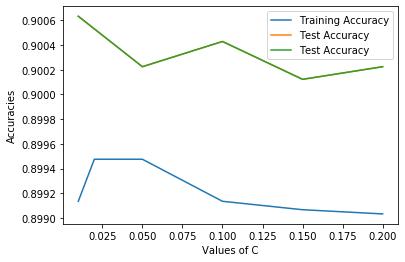

In [52]:
#hyper-parameter tuning and get the best value of regularization constant c in order to avoid overfitting
values_of_C = [0.01, 0.02, 0.05, 0.1, 0.15, 0.2]

train_accuracy = []
test_accuracy = []
validation_accuracy = []

for c in values_of_C:
    logreg = LogisticRegression(C = c)
    logreg.fit(X_train_scaled, y_train)
    train_accuracy.append(logreg.score(X_train_scaled, y_train))
    test_accuracy.append(logreg.score(X_test_scaled, y_test))
    validation_accuracy.append(logreg.score(X_test_scaled, y_test))

plt.plot(values_of_C, train_accuracy, label = "Training Accuracy")
plt.plot(values_of_C, test_accuracy, label = "Test Accuracy")
plt.plot(values_of_C, validation_accuracy, label = "Test Accuracy")
plt.legend()
plt.xlabel("Values of C")
plt.ylabel("Accuracies")
plt.show()

In [53]:
#rebuild the Logistic Regression model
logreg2 = LogisticRegression(C=0.05)
logreg2.fit(X_train_scaled, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
#predict using the validation data
y_pred1 = logreg2.predict(X_validation_scaled)
print(bankdata_encoded["target_name"][y_pred1].values)
print(bankdata_encoded["target_name"][y_pred1].value_counts())

['no' 'no' 'no' ... 'no' 'no' 'no']
no    2060
Name: target_name, dtype: int64


In [55]:
#check the performance of the new Logistic Regression model
print(f"Modified Train Accuracy: \t{logreg2.score(X_train_scaled, y_train)*100:.4}%")
print(f"Modified Test Accuracy: \t{logreg2.score(X_test_scaled, y_test)*100:.4}%")
print(f"Modified Validation Accuracy: \t{logreg2.score(X_validation_scaled, y_validation)*100:.4}%")

Modified Train Accuracy: 	89.95%
Modified Test Accuracy: 	90.02%
Modified Validation Accuracy: 	90.58%


In [56]:
#train the Random Forest model
randforest1 = RandomForestClassifier(random_state=0)
randforest1.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [57]:
#check the performance of the Random Forest model
print(f"Train Accuracy: \t{randforest1.score(X_train_scaled, y_train)*100:.4}%")
print(f"Test Accuracy: \t\t{randforest1.score(X_test_scaled, y_test)*100:.4}%")
print(f"Validation Accuracy: \t{randforest1.score(X_validation_scaled, y_validation)*100:.4}%")

Train Accuracy: 	99.48%
Test Accuracy: 		89.5%
Validation Accuracy: 	89.27%


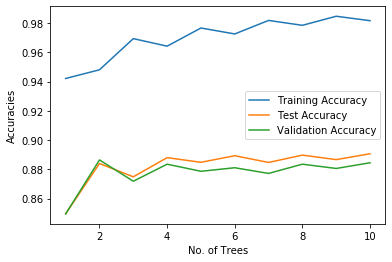

In [58]:
#hyper-parameter tune and get the best value of the number of trees in the forest in order to avoid overfitting
no_of_trees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

train_accuracy = []
test_accuracy = []
validation_accuracy = []

for tree in no_of_trees:
    randforest = RandomForestClassifier(n_estimators=tree, random_state=0)
    randforest.fit(X_train_scaled, y_train)
    train_accuracy.append(randforest.score(X_train_scaled, y_train))
    test_accuracy.append(randforest.score(X_test_scaled, y_test))
    validation_accuracy.append(randforest.score(X_validation_scaled, y_validation))

plt.plot(no_of_trees, train_accuracy, label = "Training Accuracy")
plt.plot(no_of_trees, test_accuracy, label = "Test Accuracy")
plt.plot(no_of_trees, validation_accuracy, label = "Validation Accuracy")
plt.legend()
plt.xlabel("No. of Trees")
plt.ylabel("Accuracies")
plt.show()

In [59]:
#re-train the Random Forest model
randforest2 = RandomForestClassifier(n_estimators=2, random_state=0)
randforest2.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
#predict using the validation data
y_pred2 = randforest2.predict(X_validation_scaled)
print(bankdata_encoded["target_name"][y_pred2].values)
print(bankdata_encoded["target_name"][y_pred2].value_counts())

['no' 'no' 'no' ... 'no' 'no' 'no']
no    2060
Name: target_name, dtype: int64


In [61]:
#check the performance of the new Random Forest model
print(f"Modified Train Accuracy: \t{randforest.score(X_train_scaled, y_train)*100:.4}%")
print(f"Modified Test Accuracy: \t{randforest2.score(X_test_scaled, y_test)*100:.4}%")
print(f"Modified Validation Accuracy: \t{randforest2.score(X_validation_scaled, y_validation)*100:.4}%")

Modified Train Accuracy: 	98.16%
Modified Test Accuracy: 	88.4%
Modified Validation Accuracy: 	88.64%
